<a href="https://colab.research.google.com/github/ShreyaMohanty12/Task1_GRIP-AUGUST-21/blob/main/TSF_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name :**  Shreya Mohanty
# **Batch :** August '21

# *Task 1* : Prediction using Supervised ML


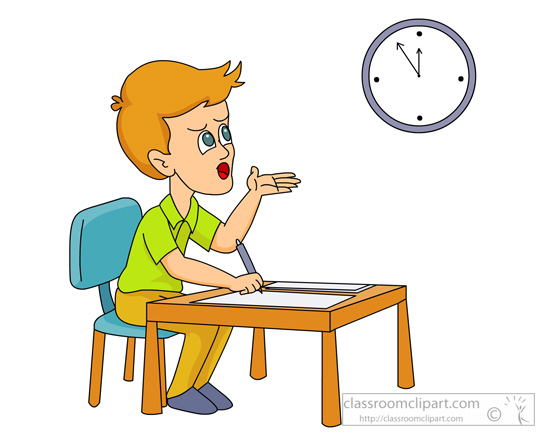

# *Prediction using Supervised ML*
 Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just two variables(one independent + one dependent).

What will be predicted score if a student studies for 9.25 hrs/ day?

 Dataset link : [Dataset Link](http://bit.ly/w-data)


In [ ]:
# Import necessary libraries

from urllib.request import urlretrieve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

# Loading the dataset

In [ ]:
task_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [ ]:
urlretrieve(task_url, "Task.csv")

('Task.csv', <http.client.HTTPMessage at 0x7f1f63755f90>)

In [ ]:
df = pd.read_csv('Task.csv')

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Printing Shape of the dataset

df.shape

(25, 2)

# Basic Statistics of the dataset

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We can observe that we have no null-values in the dataset

In [ ]:
# Finding out correlation between input feature and target

df['Scores'].corr(df['Hours'])

0.9761906560220887

The closer correlation is to 1, the closer the data points fall to a straight line, thus, the linear association is stronger.

A positive correlation signifies positive association.

# Visualization

In [ ]:
# Scatterplot of the dataset

px.scatter(df,x='Hours',y='Scores',title='Scores vs Hours of Study')

# Separating Input and Output Variables



In [ ]:
x = df.drop(df[['Scores']],axis=1)   # input feature - 'Hours'

y = df['Scores']     # output feature - 'Scores'

# Splitting of data into train and test examples

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Size of training and test set

print('size of training set : ',x_train.shape[0])
print('size of test set : ',x_test.shape[0])

size of training set :  20
size of test set :  5


# Creating a Linear_Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation and Prediction

In [ ]:
model.score(x_train,y_train)

0.9491209376364417

In [ ]:
model.score(x_test,y_test)

0.9678055545167994

From the above scores, we can observe that probably, we are not overfitting the training set.

In [ ]:
# Making Predictions

predict_df = pd.DataFrame({
    'Hours':df['Hours'],
    'True scores':df['Scores'],
    'Predicted scores':model.predict(x)})

In [ ]:
predict_df.sample(5)

,Hours,True scores,Predicted scores
3,8.5,75,85.124557
14,1.1,17,13.477178
20,2.7,30,28.968503
21,4.8,54,49.300867
23,6.9,76,69.633232


In [ ]:
# Q. What will be predicted score if a student studies for 9.25 hrs/day ?

print(model.predict([[9.25]])[0])

92.38611528261494


In [ ]:
# Finding Root-Mean-squared-error

from sklearn.metrics import mean_squared_error
import math
train_rmse = math.sqrt(mean_squared_error(y_train,model.predict(x_train)))
test_rmse = math.sqrt(mean_squared_error(y_test,model.predict(x_test)))
print('RMSE for training examples : ',train_rmse)
print('RMSE for test examples : ',test_rmse)

RMSE for training examples :  5.608461065868858
RMSE for test examples :  4.352380006653288


In [ ]:
# Getting the slope of line of regression (weight)

print(model.coef_[0])

9.682078154455697


In [ ]:
# Getting the intercept of line of regression

model.intercept_

2.826892353899737

So, the line of regression corresponding to the model is:

**y = 9.68*x + 2.83**

y = prediction (Score)

x = input (Hours of study)

# Visualizing the Linear_Regression model

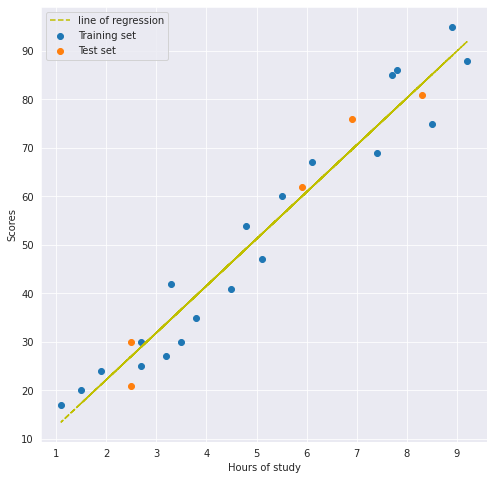

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x_train,y_train,label='Training set')
plt.scatter(x_test,y_test,label='Test set')
plt.plot(x,model.predict(x),'y--',label='line of regression')
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.legend();
